In [91]:
import numpy as np

In [92]:
np.__version__

'1.21.1'

# 여기는 AND 함수 구현 !

In [93]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

AND(0,0)
AND(1,0)
AND(0,1)
AND(1,1)

1

# 가중치와 편향 도입

In [94]:
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
print(np.sum(w*x)+b)

-0.19999999999999996


In [95]:
import numpy as np

def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7 #편향
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))


0
1
1
0


# 계단함수 구현하기

<ipython-input-96-5766eceb2217>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


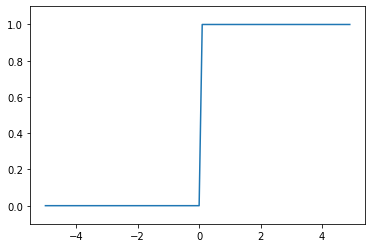

In [96]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()

   

# 시그모이드 함수 구현하기

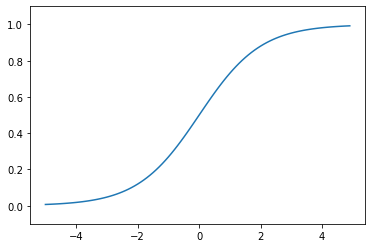

In [97]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()


# ReLU 함수 구현하기

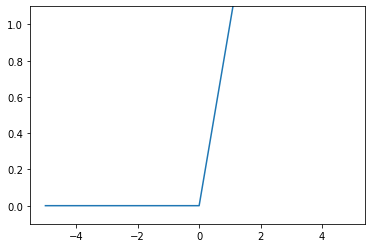

In [98]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()


# 다차원 배열

In [99]:
import numpy as np

A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])

print(A.shape)
print(B.shape)

print(np.dot(A, B))


(3, 2)
(2,)
[23 53 83]


In [100]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X ,W)
print(Y)

[ 5 11 17]


# 각층의 신호전달 구현하기

In [101]:
x = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 

#1층 ---------------

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


Z1 = sigmoid(A1)

print(A1)
print(Z1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

#2층 ------------------------

def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)

print(Y)

#마지막 층

(2, 3)
(2,)
(3,)
[0.6 1.3 2. ]
[0.64565631 0.78583498 0.88079708]
(3,)
(3, 2)
(2,)
[0.32403126 0.71230655]


# 구현정리

In [102]:
def init_network():
    network = {} # 딕셔너리 타입이므로
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    Z1 = sigmoid(a1)
    a2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(a2)
    a3 = np.dot(Z2, W3) + b3
    y = identify_function(a3) # 식쓰면서 하면 안 헷갈림

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 소프트 맥스 함수 구현

In [103]:
def softmax(a):
    c =np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

# MNIST 이미지 분류

In [104]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = False, normalize = False) # (n, c, w, h)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


# 손실함수 - 평균제곱의 오차

In [105]:
import numpy as np


def mean_squared_error(y, t):
    
    return 0.5 * np.sum((y-t)**2)


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


# 손실함수 - 교차 엔트로피 오차


In [106]:
import numpy as np
import math

def cross_entropy_error(y, t):
    delta = 1e-7   
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))


0.510825457099338
2.302584092994546


# 훈련데이터에서 지정한 수의 데이터를 무작위로 골라내기

In [107]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(np.random.choice(60000, 10))
print(batch_mask)

(60000, 784)
(60000, 10)
[57165 39332  6744 54381 52944 33444 57802 37011 49730  1118]
[46854 45143 30910 17903 17856 15909 15446 22207 42326   971]


# 교차 엔트로피 오차 구하기

In [108]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

# print(x_train.shape)
# print(t_train.shape)

# train_size = x_train.shape[0]
# batch_size = 10
# batch_mask = np.random.choice(train_size, batch_size)
# x_batch = x_train[batch_mask]
# t_batch = t_train[batch_mask]

# print(np.random.choice(60000, 10))
# print(batch_mask)
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


t=2 와 예측 간의 CEL 계산.
예측은 4.
[[0.2]]
결과는 1.6094378124341002
t=7 와 예측 간의 CEL 계산.
예측은 3.
[[0.05]]
결과는 2.995732173553991
t=0 와 예측 간의 CEL 계산.
예측은 6.
[[0.1]]
결과는 2.3025849929940456
t=4 와 예측 간의 CEL 계산.
예측은 9.
[[0.05]]
결과는 2.995732173553991
t=9 와 예측 간의 CEL 계산.
예측은 9.
[[0.35]]
결과는 1.0498220244986778
t=6 와 예측 간의 CEL 계산.
예측은 6.
[[0.3]]
결과는 1.203972704325936
t=5 와 예측 간의 CEL 계산.
예측은 7.
[[0.1]]
결과는 2.3025849929940456
t=1 와 예측 간의 CEL 계산.
예측은 6.
[[0.05]]
결과는 2.995732173553991
t=3 와 예측 간의 CEL 계산.
예측은 3.
[[0.4]]
결과는 0.916290631874155
t=8 와 예측 간의 CEL 계산.
예측은 7.
[[0.2]]
결과는 1.6094378124341002
[1.6094378124341002, 2.995732173553991, 2.3025849929940456, 2.995732173553991, 1.0498220244986778, 1.203972704325936, 2.3025849929940456, 2.995732173553991, 0.916290631874155, 1.6094378124341002]


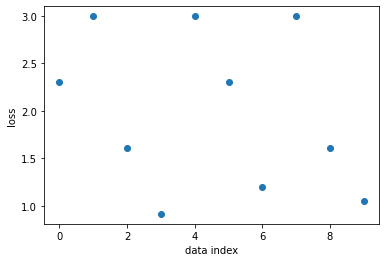

In [115]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    # print(batch_size)
    print(y[np.arange(batch_size), t])
    return -np.sum(np.log(y[np.arange(batch_size), t])+1e-7) / batch_size


# print(f"Batch size of y is {batch_size}")rn -np.sum(np.log(y[np.arange(batcht_size), t])) / batch_size

# (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = False)

t = [2, 7, 0, 4, 9, 6, 5, 1, 3, 8]
y = [[0.1, 0.05, 0 2.1, 2, 0.3, 0.1, 0.0, 0.05, 0.0, 0.0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
[0.1, 0.05, 0.1, 0.6
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.6, 0.0, 0.0, 0.0],
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.0, 0.0, 0.6],
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.1, 0.05, 0.1, 0.35],
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.3, 0.3, 0.0, 0.0],
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.2, 0.4, 0.0, 0.0],
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.2, 0.1, 0.1, 0.2],
[0.1, 0.05, 0.1, 0.4, 0.05, 0.1, 0.0, 0.1, 0.1, 0.0],
[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.3, 0.2, 0.1]]
# print(x_train.shape)
# print(t_train.shape)

# train_size = x_train.shape[0]
# batch_size = 10
# batch_mask = np.random.choice(train_size, batch_size)
# x_batch = x_train[batch_mask]
# t_batch = t_train[batch_mask]

# print(np.random.choice(60000, 10))
# prin t(x_batch.shape)
A = []
for i in range(10):
    print(f"t={t[i]} 와 예측 간의 CEL 계산.")
    pred = np.argmax(y[i])
    print(f"예측은 {pred}.")    
    loss = cross_entropy_error(np.array(y[i]), np.array(t[i]))
    print(f"결과는 {loss}")
    A.append(loss)
print(A)

np.array(A)
)
# %matplotlib inline

# index = range(len(y[0]))
# plt.plot(index.y[0])
# plt.piot(y[0].cumsum(), 'b', lw = 1.5)
# plt.piot(y[0].cumsum(), 'ro') plt.xlabel(data indexx') plt.ylabel(loss'')
# plt.figure(figsize = (10, 4))
# plt.plot())
pltscatterttd,As)
plt.show()